In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
dir_black = os.path.join(r"C:\Users\HP\Soil types\Black Soil")
dir_Cinder = os.path.join(r"C:\Users\HP\Soil types\Cinder Soil")
dir_Laterite = os.path.join(r'C:\Users\HP\Soil types\Laterite Soil')
dir_peat = os.path.join(r"C:\Users\HP\Soil types\Peat Soil")
dir_yellow = os.path.join(r"C:\Users\HP\Soil types\Yellow Soil")

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
img_size=220
batch_size=10

target_size=(img_size,img_size)
input_shape=(img_size,img_size,3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        r"C:\Users\HP\Soil types", 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [14]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [15]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [16]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [18]:
total_sample = train_generator.n
n_epochs = 30
print(total_sample)

156


In [19]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 6s 267ms/step - loss: 1.6301 - acc: 0.2192
Epoch 2/30
15/15 [==============================] - 4s 260ms/step - loss: 1.5960 - acc: 0.2534
Epoch 3/30
15/15 [==============================] - 4s 258ms/step - loss: 1.4093 - acc: 0.3836
Epoch 4/30
15/15 [==============================] - 4s 254ms/step - loss: 1.2205 - acc: 0.4247
Epoch 5/30
15/15 [==============================] - 4s 257ms/step - loss: 1.0405 - acc: 0.4863
Epoch 6/30
15/15 [==============================] - 4s 251ms/step - loss: 1.1062 - acc: 0.4452
Epoch 7/30
15/15 [==============================] - 4s 255ms/step - loss: 0.9437 - acc: 0.5137
Epoch 8/30
15/15 [==============================] - 4s 261ms/step - loss: 0.9995 - acc: 0.5479
Epoch 9/30
15/15 [==============================] - 4s 262ms/step - loss: 0.9544 - acc: 0.6164
Epoch 10/30
15/15 [==============================] - 4s 263ms/step - loss: 0.8655 - acc: 0.6301
Epoch 11/30
15/15 [==============================

In [20]:
import matplotlib.pyplot as plt

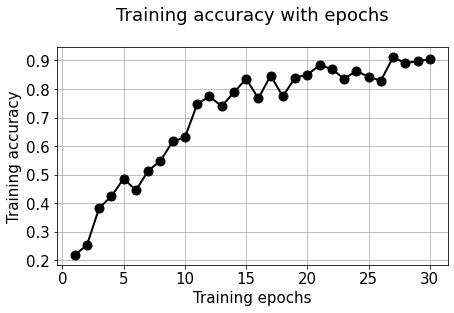

In [21]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()